# Quick check

In [1]:
# imports
import numpy as np
import pandas

import seaborn as sns

from matplotlib import pyplot as plt

## Load

In [2]:
cube = np.load('Cubes/craco_lm_F_cube.npz')
list(cube.keys())

['ll',
 'lC',
 'params',
 'pzDM',
 'pDM',
 'pDMz',
 'pz',
 'F',
 'lmean',
 'lls0',
 'P_zDM0',
 'P_n0',
 'P_s0',
 'N0']

In [3]:
LL = cube['ll']
LL.shape

(50, 50)

In [4]:
np.nanmax(LL[:,0])

-573.6371

## Parse

In [5]:
F = cube['F']
lm = cube['lmean']
#
dF = F[1]-F[0]
dlm = lm[1] - lm[0]

## Plot

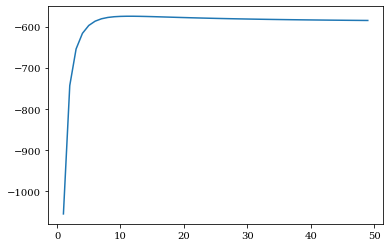

In [6]:
plt.clf()
ax = plt.gca()
ax.plot(LL[:,0])
plt.show()

## Show it all

In [7]:
nans = np.isnan(LL)
LL_clean = LL.copy()
LL_clean[nans] = -9e9
#
LL_clean -= LL_clean.max()

Text(0, 0.5, 'lmean')

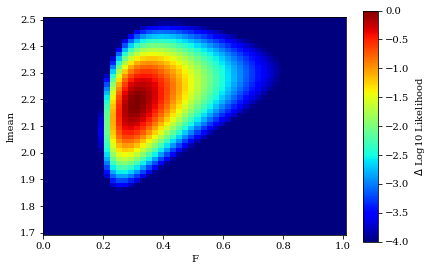

In [8]:
plt.clf()
ax=plt.gca()
#
im = plt.imshow(LL_clean.T, origin='lower', vmin=-4., vmax=0., cmap='jet',
          extent=[F.min()-dF/2, F.max()+dF/2, 1.7-dlm/2, 2.5+dlm/2], aspect='auto')
# Color bar
cbar=plt.colorbar(im,fraction=0.046, shrink=1.2,aspect=15,pad=0.05)
cbar.set_label(r'$\Delta$ Log10 Likelihood')
#
ax.set_xlabel('F')
ax.set_ylabel('lmean')